# Задания

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import scipy.stats as st
from scipy import stats
from statsmodels.stats.weightstats import _tconfint_generic
from statsmodels.stats.proportion import proportion_confint
from math import sqrt

## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

In [2]:
## создаем датафрейм, где преобразуем столбики с временем и датой заказа в нужный формат (из строкового в формат даты и времени) для дальнейшего использования и удобства сортировки
data = pd.read_csv('../datasets/pizza.csv', low_memory = False, sep = ';',
                  parse_dates=[['order_date', 'order_time']])
data.head()

C:\Users\mzkh9\AppData\Local\Temp\ipykernel_1572\1949028448.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../datasets/pizza.csv', low_memory = False, sep = ';',


,order_date_order_time,order_details_id,order_id,pizza_id,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time
0,2015-01-01 11:38:36,1,1,hawaiian_m,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30
1,2015-01-01 11:57:40,2,2,classic_dlx_m,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26
2,2015-01-01 11:57:40,3,2,five_cheese_l,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19
3,2015-01-01 11:57:40,4,2,ital_supr_l,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:10:58
4,2015-01-01 11:57:40,5,2,mexicana_m,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 12:14:24


In [3]:
## переименовываем столбец order_date_order_time в dt для удобства
data = data.rename(columns={'order_date_order_time':'dt'})

## создаем в датафрейме столбец с днями недели
data['week_day'] = data['dt'].dt.day_name(locale = 'Russian')
data.head()

,dt,order_details_id,order_id,pizza_id,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time,week_day
0,2015-01-01 11:38:36,1,1,hawaiian_m,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30,Четверг
1,2015-01-01 11:57:40,2,2,classic_dlx_m,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26,Четверг
2,2015-01-01 11:57:40,3,2,five_cheese_l,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19,Четверг
3,2015-01-01 11:57:40,4,2,ital_supr_l,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:10:58,Четверг
4,2015-01-01 11:57:40,5,2,mexicana_m,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 12:14:24,Четверг


In [4]:
## посмотрим сколько пицц в какой день заказали
data.kolvo1 = pd.DataFrame(columns=['wd', 'count'])
data.kolvo1['wd'] = data['week_day'].value_counts().index
data.kolvo1['count'] = data['week_day'].value_counts().values
data.kolvo1

C:\Users\mzkh9\AppData\Local\Temp\ipykernel_1572\1143830380.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.kolvo1 = pd.DataFrame(columns=['wd', 'count'])


,wd,count
0,Четверг,857
1,Пятница,818
2,Суббота,706
3,Вторник,702
4,Среда,655
5,Понедельник,634
6,Воскресенье,628


In [5]:
## создадим датафрейм с днями недели и количеством заказов пицц так, чтобы дни недели шли по порядку, как в календаре
dn = pd.DataFrame({'wd' : ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
                   'num' : [1, 2, 3, 4, 5, 6, 7]})
dk=pd.DataFrame(columns=['wd', 'count'])
dk['wd'] = data['week_day'].value_counts().index
dk['count'] = data['week_day'].value_counts().values
dk_dn = dn.merge(dk, on = 'wd')
dk_dn

,wd,num,count
0,Понедельник,1,634
1,Вторник,2,702
2,Среда,3,655
3,Четверг,4,857
4,Пятница,5,818
5,Суббота,6,706
6,Воскресенье,7,628


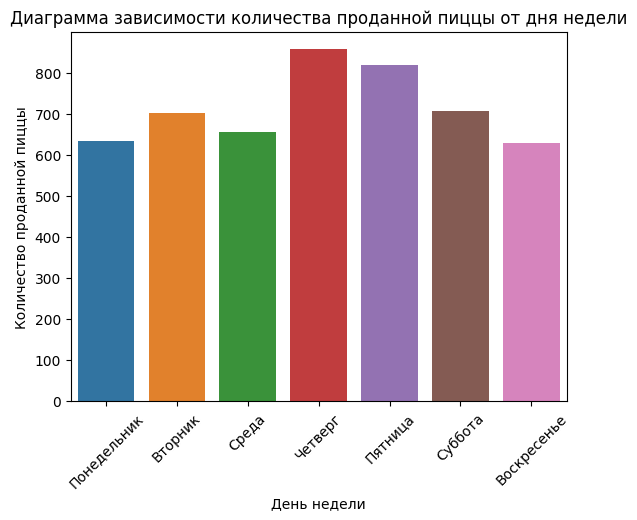

In [6]:
## построим диаграмму
sns.barplot(x = dk_dn['wd'],
            y = dk_dn['count'])
plt.xlabel('День недели')
plt.ylabel('Количество проданной пиццы')
plt.title('Диаграмма зависимости количества проданной пиццы от дня недели')
plt.xticks(rotation=45)
plt.show()

In [7]:
print('Больше всего пиццы было продано в', data.kolvo1.iloc[0]['wd'])
print('Меньше всего пиццы было продано в', data.kolvo1.iloc[6]['wd'])

Больше всего пиццы было продано в Четверг
Меньше всего пиццы было продано в Воскресенье


### Задание 2

Посчитай, сколько **секунд** необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - `cook_time`. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [8]:
## Код тут
data['lead_time'] = data['lead_time'].astype('datetime64[ns]')
data['cook_time'] = (data['lead_time'] - data['dt']).dt.seconds

avg_time = round(data['cook_time'].mean())
med_time = round(data['cook_time'].median())
max_time = round(data['cook_time'].max())
min_time = round(data['cook_time'].min())

print ('Среденее время приготовления пиццы:', avg_time)
print ('Медианной время приготовления пиццы:', med_time)
print ('Максимальное время приготовления пиццы:', max_time)
print ('Минимальное время приготовления пиццы:', min_time)

Среденее время приготовления пиццы: 1007
Медианной время приготовления пиццы: 1006
Максимальное время приготовления пиццы: 1609
Минимальное время приготовления пиццы: 444


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

In [9]:
## Код тут
time = data['cook_time']

def get_95(values):
    mean_std = values.std(ddof=1)/sqrt(len(values))  # среднее стандартное отклоение
    CI = _tconfint_generic(values.mean(), mean_std, len(values) - 1, 0.05, 'two-sided') # вычисляем доверительный интервал
    return(int(np.round(CI[0])), int(np.round(CI[1])))

print ('95% доверительный интеррвал для среднего времени приготовления пиццы в секундах =', get_95(time))

95% доверительный интеррвал для среднего времени приготовления пиццы в секундах = (1002, 1012)


### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время 
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления 
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [10]:
## карта из пицц, которая заказана более 10 раз
pizza_cnt_100 = data[data['pizza_name'].map(data['pizza_name'].value_counts()) > 100]
# pizza_cnt_100


## Создаем словарь через цикл, который проходит по столбику с именем пиццы и для каждой пиццы расчитывает доверительный интервал и в словарь добавляет его верхнюю границу
pizza_dict = {}

for pizza in pizza_cnt_100['pizza_name']:
    one_pizza = pizza_cnt_100[pizza_cnt_100['pizza_name'] == pizza]
    tin = one_pizza['cook_time']
    st_dev = tin.std(ddof=1) / np.sqrt(len(one_pizza))
    CI100 = stats.t.interval(0.95, df = len(one_pizza) - 1, loc=tin.mean(), scale = st_dev)
    pizza_dict[pizza]= (round(CI100[1]))

pizza_dict

{'The Hawaiian Pizza': 1023,
 'The Classic Deluxe Pizza': 1040,
 'The Five Cheese Pizza': 1051,
 'The Italian Supreme Pizza': 1032,
 'The Mexicana Pizza': 1023,
 'The Thai Chicken Pizza': 1036,
 'The Prosciutto and Arugula Pizza': 1037,
 'The Barbecue Chicken Pizza': 1027,
 'The Greek Pizza': 1021,
 'The Spinach Supreme Pizza': 1067,
 'The Italian Capocollo Pizza': 1031,
 'The Spicy Italian Pizza': 1036,
 'The Vegetables + Vegetables Pizza': 1029,
 'The Southwest Chicken Pizza': 1042,
 'The California Chicken Pizza': 1030,
 'The Pepperoni Pizza': 1019,
 'The Big Meat Pizza': 1040,
 'The Four Cheese Pizza': 1014,
 'The Napolitana Pizza': 1021,
 'The Italian Vegetables Pizza': 1069,
 'The Pepper Salami Pizza': 1020,
 'The Spinach and Feta Pizza': 1026,
 'The Sicilian Pizza': 1019,
 'The Chicken Alfredo Pizza': 1049,
 'The Pepperoni, Mushroom, and Peppers Pizza': 1056}

In [11]:
## выводим максимум из словарика
highCI = max(pizza_dict.values())
pizza_highCI = max(pizza_dict, key = pizza_dict.get)
print('Пицца, у которой верхняя граница интервала самая высокая -', pizza_highCI)
print('Верхняя граница интервала ее изготовления -', highCI, 'сек')

Пицца, у которой верхняя граница интервала самая высокая - The Italian Vegetables Pizza
Верхняя граница интервала ее изготовления - 1069 сек


### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления. 
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [12]:
## Код тут
## Создаем словарь через цикл, который проходит по столбику с именем пиццы и для каждой пиццы расчитывает доверительный интервал и в словарь добавляет его ширину
pizza_dict2 = {}

for pizza in pizza_cnt_100['pizza_name']:
    one_pizza = pizza_cnt_100[pizza_cnt_100['pizza_name'] == pizza]
    tin = one_pizza['cook_time']
    st_dev = tin.std(ddof=1) / np.sqrt(len(one_pizza))
    CI100 = stats.t.interval(0.95, df = len(one_pizza) - 1, loc=tin.mean(), scale = st_dev)
    pizza_dict2[pizza]= (round(CI100[1]) - round(CI100[0]))

pizza_dict2

{'The Hawaiian Pizza': 49,
 'The Classic Deluxe Pizza': 50,
 'The Five Cheese Pizza': 58,
 'The Italian Supreme Pizza': 50,
 'The Mexicana Pizza': 60,
 'The Thai Chicken Pizza': 49,
 'The Prosciutto and Arugula Pizza': 59,
 'The Barbecue Chicken Pizza': 47,
 'The Greek Pizza': 60,
 'The Spinach Supreme Pizza': 70,
 'The Italian Capocollo Pizza': 60,
 'The Spicy Italian Pizza': 54,
 'The Vegetables + Vegetables Pizza': 51,
 'The Southwest Chicken Pizza': 54,
 'The California Chicken Pizza': 46,
 'The Pepperoni Pizza': 43,
 'The Big Meat Pizza': 55,
 'The Four Cheese Pizza': 49,
 'The Napolitana Pizza': 57,
 'The Italian Vegetables Pizza': 63,
 'The Pepper Salami Pizza': 53,
 'The Spinach and Feta Pizza': 56,
 'The Sicilian Pizza': 48,
 'The Chicken Alfredo Pizza': 74,
 'The Pepperoni, Mushroom, and Peppers Pizza': 62}

In [13]:
## выводим максимум из словарика
highCI2 = max(pizza_dict2.values())
pizza_highCI2 = max(pizza_dict2, key = pizza_dict2.get)
print('Пицца, у которой самый широкий доверительный интервал -', pizza_highCI2)
print('Доверительный интервал пиццы',  pizza_highCI2, 'составляет-', highCI, 'сек')

Пицца, у которой самый широкий доверительный интервал - The Chicken Alfredo Pizza
Доверительный интервал пиццы The Chicken Alfredo Pizza составляет- 1069 сек


## AB тестирование

### Задание 6

В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем, 
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод 
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

In [14]:
## Код тут
click_stat = pd.read_csv('../datasets/click.csv', low_memory = False)
click_stat.describe()

,banner_a,banner_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [15]:
ca = proportion_confint(click_stat['banner_a'].sum(), click_stat.shape[0])
cb = proportion_confint(click_stat['banner_b'].sum(), click_stat.shape[0])
print('Доверительный интервал для старого баннера =', ca)
print('Доверительный интервал для нового баннера =', cb)

if ca[0]- cb[1] > 0 or cb[0]- ca[1] > 0:
    print('Доверительные интервалы не пересекаются')
else:
    print('Доверительные интервалы пересекаются')



Доверительный интервал для старого баннера = (0.02530064022092865, 0.04869935977907135)
Доверительный интервал для нового баннера = (0.03911451622486782, 0.06688548377513218)
Доверительные интервалы пересекаются


### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [16]:
## Код тут
def proportion_confint_dif_ind(sample1, sample2, alpha=0.05):
    z=scipy.stats.norm.ppf(1-alpha/2.)
    p1=float(sum(sample1)) / len(sample1)
    p2=float(sum(sample2)) / len(sample2)
    left=(p1-p2) - z *np.sqrt(p1*(1-p1)/len(sample1) + p2*(1-p2)/ len(sample2))
    right=(p1-p2) + z *np.sqrt(p1*(1-p1)/len(sample1) + p2*(1-p2)/ len(sample2))
    return [round(left, 5), round(right, 5)]
print('95% доверительный интервал для разности двух долей',
      proportion_confint_dif_ind(click_stat['banner_a'], click_stat['banner_b']))

95% доверительный интервал для разности двух долей [-0.03416, 0.00216]


### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [17]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [18]:
## Код тут
alpha = 0.05
z=scipy.stats.norm.ppf(1-alpha/2.)
check=z_stat(click_stat['banner_a'], click_stat['banner_b'])
if check > z:
    print('Гипотеза H0 подтверждена (старый баннер лучше).')
else:
    print(' Гипотеза H0 опровергнута')
    
check1=z_stat(click_stat['banner_b'], click_stat['banner_a'])
if check1 > 0:
    print('Гипотеза H1 подтверждена (новый баннер лучше).')
else:
    print(' Гипотеза H1 опровергнута')

 Гипотеза H0 опровергнута
Гипотеза H1 подтверждена (новый баннер лучше).


## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

Объясни, почему получается такое значение корреляций.

In [19]:
x = np.linspace(-10,10,100)
y1 = x ** 2
y2 = -x **2
y3 = np.log(x ** 2 + 1)

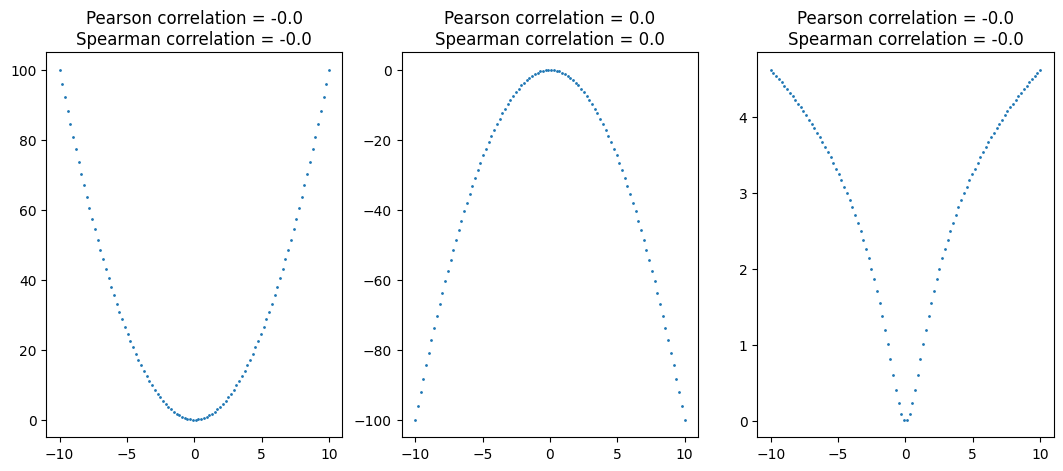

In [20]:
## Код тут 
fig, (ax1, ax2, ax3)=plt.subplots(1, 3, figsize=(13,5))
ax1.scatter(x, y1, s=1)
ax1.set_title('Pearson correlation = {}\nSpearman correlation = {}'.
              format(round(st.pearsonr(x,y1)[0], 2), round(st.spearmanr(x,y1)[0], 2)))
ax2.scatter(x, y2, s=1)
ax2.set_title('Pearson correlation = {}\nSpearman correlation = {}'.
              format(round(st.pearsonr(x,y2)[0], 2), round(st.spearmanr(x,y2)[0], 2)))
ax3.scatter(x, y3, s=1)
ax3.set_title('Pearson correlation = {}\nSpearman correlation = {}'.
              format(round(st.pearsonr(x,y3)[0], 2), round(st.spearmanr(x,y3)[0], 2)))
plt.show()

### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек 
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.
Какая корреляция больше устойчива к выбросам?

In [21]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

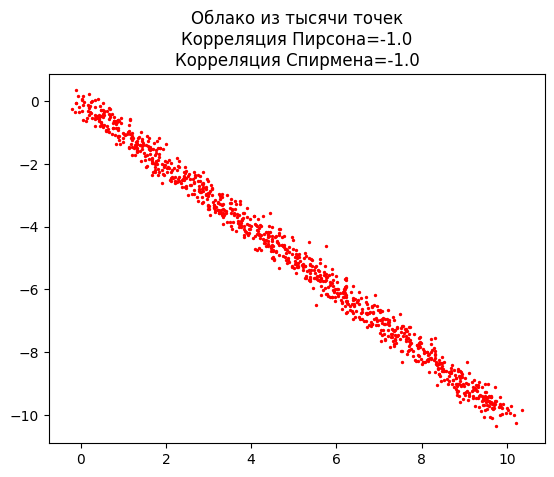

In [22]:
## Код тут
p1,s1=st.pearsonr(x,y)[0], st.spearmanr(x,y)[0]
fig, ax=plt.subplots()
ax.scatter(x,y,s=2,color='r')
ax.set_title('Облако из тысячи точек\nКорреляция Пирсона={}\nКорреляция Спирмена={}'.format(round(p1,2), round(s1,2)))
plt.show()

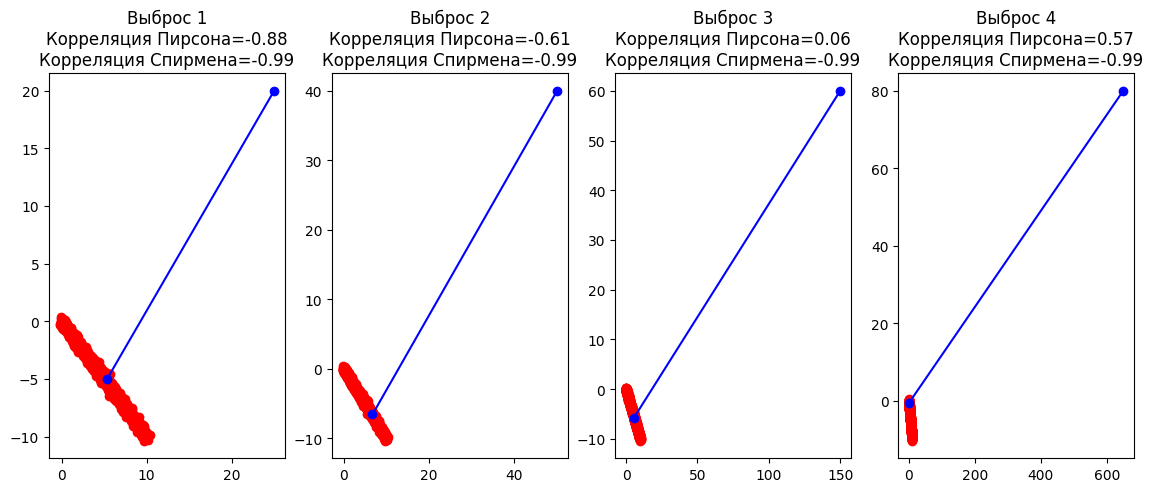

In [23]:
n_range=np.random.randint(0,1000,4)
x_range=[25, 50, 150, 650]
y_range=[20, 40, 60, 80]
fig, ax=plt.subplots(1,4, figsize=(14,5))
for n in range(4):
    x1,y1=x.copy(), y.copy()
    ax[n].scatter(x1,y1,color='r')
    ax[n].plot([x1[n_range[n]], x_range[n]], [y1[n_range[n]], y_range[n]], 'o-b')
    x1[n_range[n]]=x_range[n]
    y1[n_range[n]]=y_range[n]
    p1,s1=st.pearsonr(x1,y1)[0], st.spearmanr(x1,y1)[0]
    ax[n].set_title('Выброс {}\nКорреляция Пирсона={}\nКорреляция Спирмена={}'.
                    format(n+1, round(p1,2), round(s1,2)))
plt.show()

Корреляция Спирмена более устойчива к выбросам